In [65]:
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
import pandas as pd
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import fiona
from shapely.geometry import Point
import matplotlib as mpl

In [66]:
shapefile = gpd.read_file("Aus_Shapefile/STE_2021_AUST_GDA2020.shp")
colac_lin = gpd.read_file("NVP_Locations/colac_lineament.gpkg")
vols = pd.read_csv("Data_Inputs/CH_NVP_List_28Aug.csv")
deciles = gpd.read_file("NVP_Locations/LGAS_Decile.gpkg")

In [67]:
colac_lin = colac_lin.to_crs(shapefile.crs)
deciles = deciles.to_crs(shapefile.crs)

In [68]:
vols_df = pd.DataFrame(vols)

vols_gdf = gpd.GeoDataFrame(
    vols_df, 
    geometry=gpd.points_from_xy(vols_df["LON_CENTRE"], vols_df["LAT_CENTRE"]),
    crs=shapefile.crs
)


## Victoria Labels

In [69]:
def Victoria_Labels(ax, title=None, xlim=(140, 145.5), ylim=(-39, -36.5), aspect=4/3):

    ax.scatter(144.97806, -37.8240, color='black', zorder=5, s=50) 
    ax.scatter(140.78377, -37.82668, color='black', zorder=5, s=50)
    

    melbourne = ax.annotate(
        'Melbourne',  
        xy=(144.97806, -36.7240),
        xytext=(144.98, -37.75),
        fontsize=8,
        color='black',
        ha="center",
        zorder=7
    )
    melbourne.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])
    
    mt_gambier = ax.annotate(
        "Mt Gambier",
        xy=(140.7659, -37.8414),
        xytext=(140.7, -37.7),
        fontsize=8,
        color="black",
        zorder=7
    )
    mt_gambier.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    sa = ax.annotate(
        "South Australia",
        xy=(140.6, -37.0648),
        xytext=(140.76, -37.5),
        rotation=270,
        fontsize=8,
        color='grey',
        zorder=7
    )
    sa.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    vic = ax.annotate(
        "Victoria",
        xy=(140.2, -37.0648),
        xytext=(141.04, -37.2),
        rotation=90,
        fontsize=8,
        color='grey',
        zorder=7
    )
    vic.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

    # Set axes styling
    ax.set_facecolor('#e0f4ff')
    if title:
        ax.set_title(title, fontsize=16)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect(aspect, adjustable='box')
    
    

In [60]:
ranking_labels = list(range(1,11))
color_map = {
    1: "#40004b",  
    2: "#762a83",       
    3: "#9970ab",   
    4: "#c2a5cf",        
    5: "#e7d4e8",
    6: "#d9f0d3",
    7: "#a6dba0",
    8: "#5aae61",
    9: "#1b7837",
    10: "#00441b"
    
}
deciles["color"] = deciles["IRSAD_Decile"].map(color_map)
colors = deciles["color"].tolist()
color_list = [ color_map[i] for i in ranking_labels ]
cmap       = ListedColormap(color_list)
norm = Normalize(vmin=1, vmax=10)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 

Text(0.5, 1.0, 'Socio-Economic Indexes for Local Government Areas in the NVP')

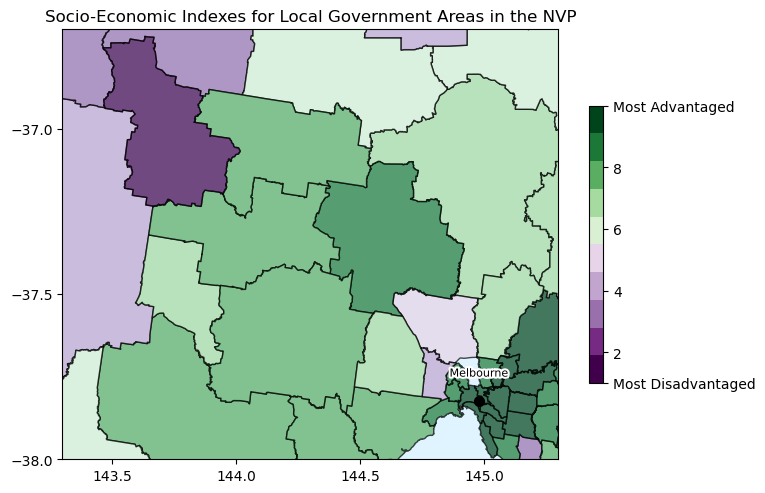

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

deciles.plot(
    ax         = ax,
    column     = "IRSAD_Decile",
    cmap       = ListedColormap(color_list),  # or any cmap
    markersize = 50,
    edgecolor  = "black",                       # reuse your BoundaryNorm
    zorder     = 2,
    norm=norm,
    alpha=0.7
)

cbar = fig.colorbar(
    sm,
    ax     = ax,
    ticks  = [1,2,4,6,8,10],
    shrink = 0.6,
    pad    = 0.05
)

# now replace “1,2,3,4,5” with text labels
cbar.ax.set_yticklabels([
    "Most Disadvantaged",
    "2",
    "4",
    "6",
    "8",
    "Most Advantaged"
])

Victoria_Labels(ax) 


ax.set_facecolor('#e0f4ff')
ax.set_xlim(143.3, 145.3)
ax.set_ylim(-38,-36.7)
ax.set_xticks([143.5, 144, 144.5, 145])
ax.set_yticks([-37, -37.5, -38])

ax.set_title("Socio-Economic Indexes for Local Government Areas in the NVP")




In [62]:
cmapdec = plt.cm.viridis

boundsdec = [0, 20, 40, 60, 80, 100, 120]
normdec   = mpl.colors.BoundaryNorm(boundsdec, ncolors=cmapdec.N, clip=True)

smdec = mpl.cm.ScalarMappable(cmap=cmapdec, norm=normdec)
smdec.set_array([])

NameError: name 'PDmatrix' is not defined

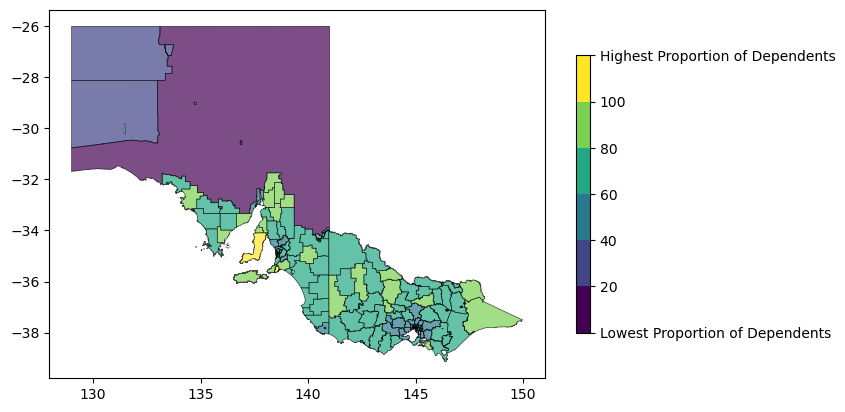

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))

# choropleth with viridis
deciles.plot(
    ax         = ax,
    column     = "LGAS_Decile_Dependency_%",
    cmap       = cmapdec,
    norm       = normdec,
    edgecolor  = "black",
    linewidth  = 0.5,
    zorder     = 2,
    alpha      = 0.7
)

# viridis colorbar
cb = fig.colorbar(
    smdec,
    ax     = ax,
    ticks  = boundsdec,
    shrink = 0.6,
    pad    = 0.05
)
cb.ax.set_yticklabels([
    "Lowest Proportion of Dependents",
    "20", "40", "60", "80", "100",
    "Highest Proportion of Dependents"
])

# overlay your points
PDmatrix.plot(
    ax         = ax,
    color      = 'orange',
    edgecolor  = '#910101',
    marker     = '^',
    markersize = 50,
    zorder     = 3,
    alpha      = 0.7
)

# finishing touches
Victoria_Labels_2(ax)
ax.set_facecolor('#e0f4ff')
ax.set_xlim(143.3, 145.3)
ax.set_ylim(-38,-36.7)
ax.set_xticks([143.5, 144, 144.5, 145])
ax.set_yticks([-37, -37.5, -38])
ax.set_title("Socio-Economic Indexes for Local Government Areas in the NVP")

plt.tight_layout()
plt.show()

# SOVI Calculation

In [70]:
cap = deciles["LGAS_Decile_Dependency Ratio"].quantile(0.95)
deciles["ADR_norm"] = deciles["LGAS_Decile_Dependency Ratio"].clip(upper=cap) / cap

In [71]:
deciles["SES_weight"] = ((11 - deciles["LGAS_Decile_IRSAD_Decile"]) / 9) 

In [72]:
deciles["vulnerability"] = deciles["ADR_norm"] * deciles["SES_weight"] * 100
deciles["vulnerability"] = deciles["vulnerability"]

In [73]:
print(deciles[["LGAS_Decile_LGA name","ADR_norm","SES_weight","vulnerability"]].head())

  LGAS_Decile_LGA name  ADR_norm  SES_weight  vulnerability
0             Adelaide  0.282350    0.222222       6.274446
1             Burnside  0.741434    0.111111       8.238154
2    Campbelltown (SA)  0.627907    0.222222      13.953483
3              Mitcham  0.682939    0.111111       7.588208
4        Mount Gambier  0.731899    1.000000      73.189875


In [76]:
vols_vuln = gpd.sjoin(
    vols_gdf,
    deciles[["vulnerability","geometry"]], 
    how="left",
    predicate="within"      
)


vols_vuln = vols_vuln.drop(columns=["index_right"])  #

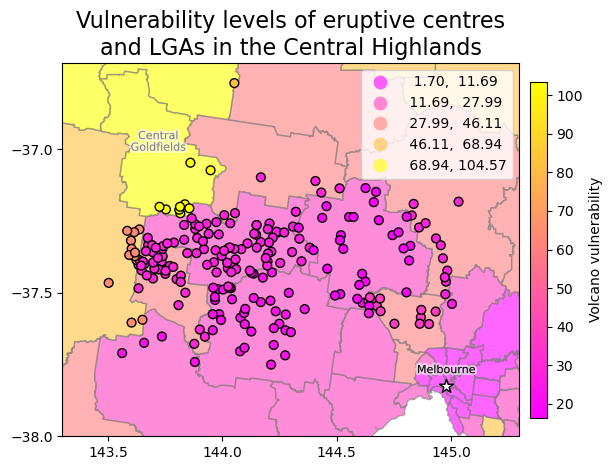

In [79]:
ax = deciles.plot(
    column="vulnerability", 
    cmap="spring", 
    legend=True, 
    scheme="Quantiles",
    k=5,
    alpha=0.6,
    edgecolor="gray"
)
vols_vuln.plot(
    ax=ax,
    column="vulnerability",
    cmap="spring",
    markersize=40,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Volcano vulnerability",
        "shrink": 0.9,
        "fraction": 0.05,
        "pad": 0.02           
    })

ax.scatter(144.97806, -37.8240, facecolor='white', edgecolor='black', zorder=3, marker='*',  s=110) #Melbourne
Melbourne = ax.annotate(
    'Melbourne',          
    xy=(144.97806, -37.8240),              
    xytext=(144.98, -37.78),          
    fontsize=8,
    color='black',
    ha="center", zorder=5
)
Melbourne.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground=(1, 1, 1, 0.6)),
    path_effects.Normal()
    ])


CG = ax.annotate(
    'Central\nGoldfields',         
    xy=(143.7, -37),               
    xytext=(143.72, -37),
    wrap=True,         
    fontsize=8,
    color='grey',
    ha="center"
)
CG.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground=(1, 1, 1, 0.6)),
    path_effects.Normal()
    ])


ax.set_title("Vulnerability levels of eruptive centres\nand LGAs in the Central Highlands", fontsize=16)


ax.set_xlim(143.3, 145.3)
ax.set_ylim(-38,-36.7)
ax.set_xticks([143.5, 144, 144.5, 145])
ax.set_yticks([-37, -37.5, -38])

plt.tight_layout()
plt.savefig("DataMap_Outputs/vulnerabilitych.png", dpi=600, bbox_inches="tight",  
    pad_inches=0.2         )


In [78]:
vols_vuln.to_csv("DataMap_Outputs/Vulnerability_Output_CH.csv", index=False)

In [105]:
results = pd.read_csv("DataMap_Outputs/Final_Volcano_Scoring.csv")


df_results = pd.DataFrame(results)

volcano_gdf = gpd.GeoDataFrame(
    df_results, 
    geometry=gpd.points_from_xy(df_results["Longitude"], df_results["Latitude"]),
    crs=shapefile.crs
)



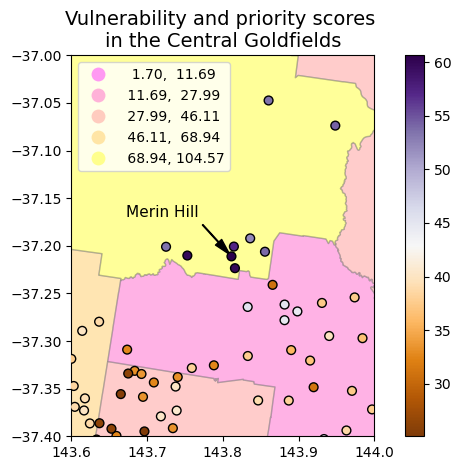

In [120]:
ax = deciles.plot(
    column="vulnerability", 
    cmap="spring", 
    legend=True, 
    scheme="Quantiles",
    k=5,
    alpha=0.4,
    edgecolor="gray"
)
volcano_plot = volcano_gdf.plot(
    ax=ax,
    column="Final score (%)",
    cmap="PuOr",
    markersize=40,
    zorder=6,
    edgecolor='black',
    legend=True
)

ax.scatter(144.97806, -37.8240, facecolor='white', edgecolor='black', zorder=3, marker='*',  s=110) #Melbourne
Melbourne = ax.annotate(
    'Melbourne',          
    xy=(144.97806, -37.8240),              
    xytext=(144.98, -37.78),          
    fontsize=8,
    color='black',
    ha="center", zorder=5
)
Melbourne.set_path_effects([
    path_effects.Stroke(linewidth=3, foreground=(1, 1, 1, 0.6)),
    path_effects.Normal()
    ])

Merin = ax.annotate(
    'Merin Hill',
    xy=(143.8114, -37.2111),
    xytext=(143.72, -37.17),
    fontsize=11,
    color='black',
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6)
)



ax.set_title("Vulnerability and priority scores \nin the Central Goldfields", fontsize=14)


ax.set_xlim(143.6, 144)
ax.set_ylim(-37.4,-37)

plt.tight_layout()
plt.savefig("DataMap_Outputs/vulnerabilityvsscore.png", dpi=600, bbox_inches="tight",  
    pad_inches=0.2         )
